# Time Analysis on S&P 500

##  1. Data Collection

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import glob

In [74]:
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')

['G:\\Dev Portfolio\\Data Analysis\\Time Series Analysis on S&P 500 Stock Market Data\\individual_stocks_5yr']

In [75]:
len(glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr/*csv')) ## total files we have 

505

In [76]:
company_list = [
    r'individual_stocks_5yr\\AAPL_data.csv' , 
    r'individual_stocks_5yr\\AMZN_data.csv' , 
    r'individual_stocks_5yr\\GOOGL_data.csv' , 
    r'individual_stocks_5yr\\MSFT_data.csv'
    
]

In [77]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [78]:
all_data = pd.DataFrame()

for file in company_list:

    current_df = pd.read_csv(file)

    all_data = pd.concat([all_data, current_df], ignore_index=True)


In [79]:
all_data.shape ## dimensions of all_data dataframe

(5036, 7)

In [80]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [81]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

## 2. Analysing change in price of the stock overtime !

In [82]:
all_data.isnull().sum() ## checking missing values

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [83]:
all_data.dtypes ## checking data-types

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [84]:
all_data['date'] = pd.to_datetime(all_data['date']) # converting date column to datetime format

In [85]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [86]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

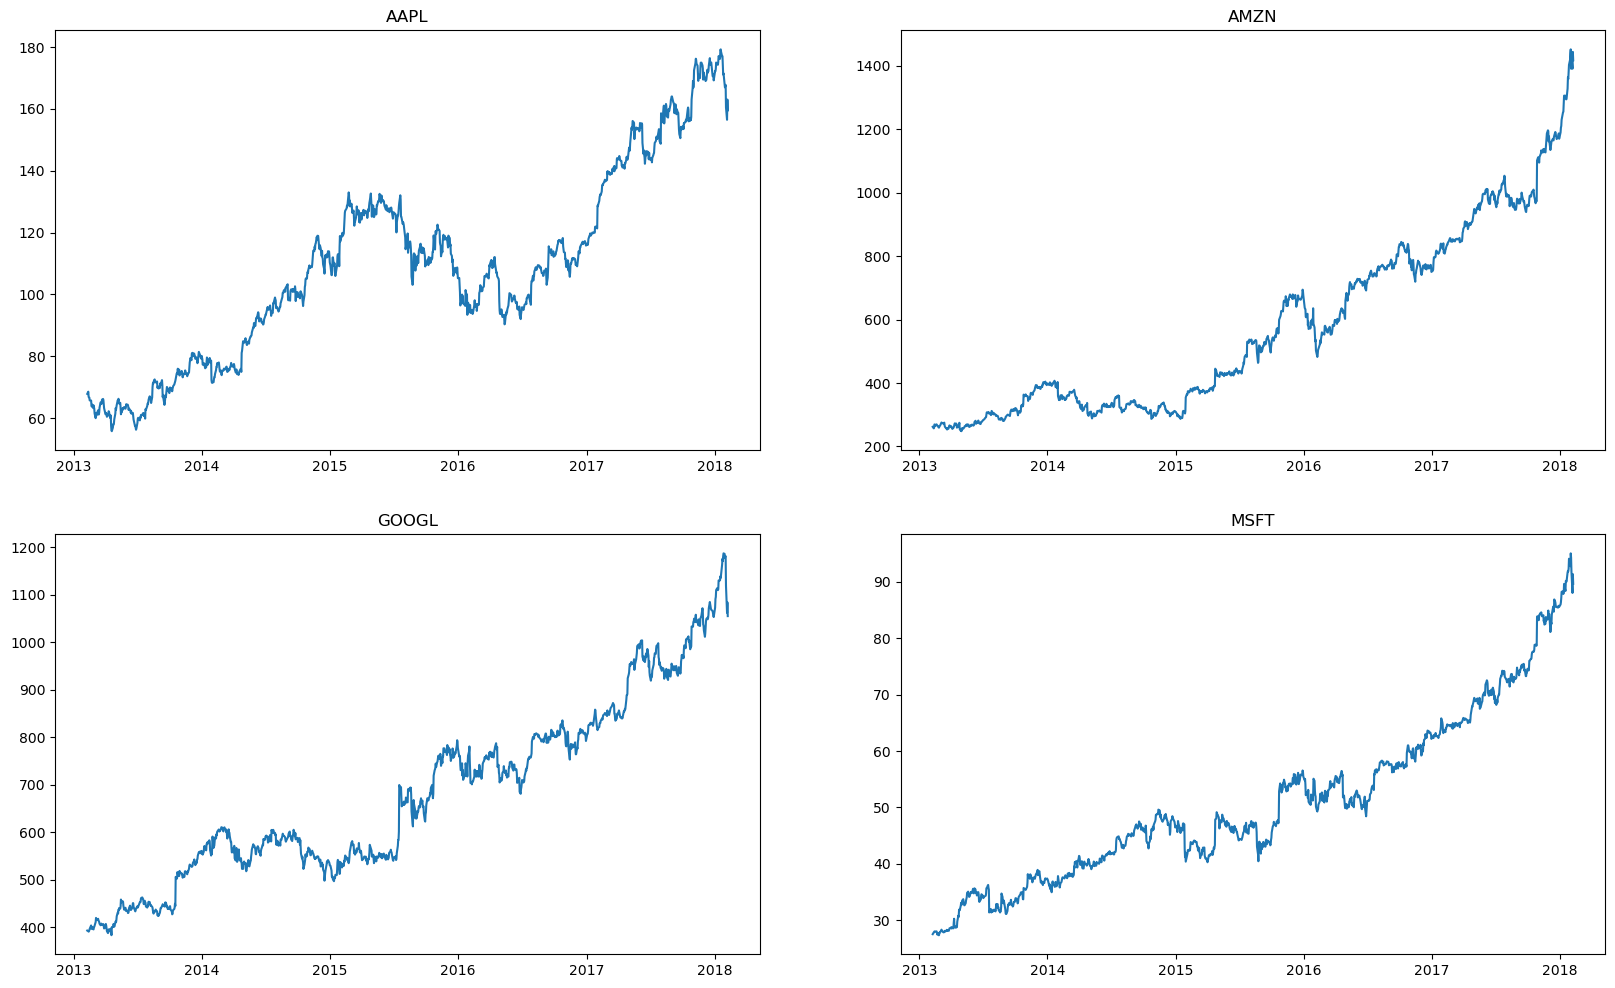

In [87]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

## 3. Moving Average

In [88]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [89]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [90]:
new_data = all_data.copy()

In [91]:
# Use windows of 10, 20, 50 days to calculate moving averages
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [92]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5029,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
5030,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
5031,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
5032,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
5033,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
5034,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
5035,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [93]:
new_data.set_index('date' , inplace=True)
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [94]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

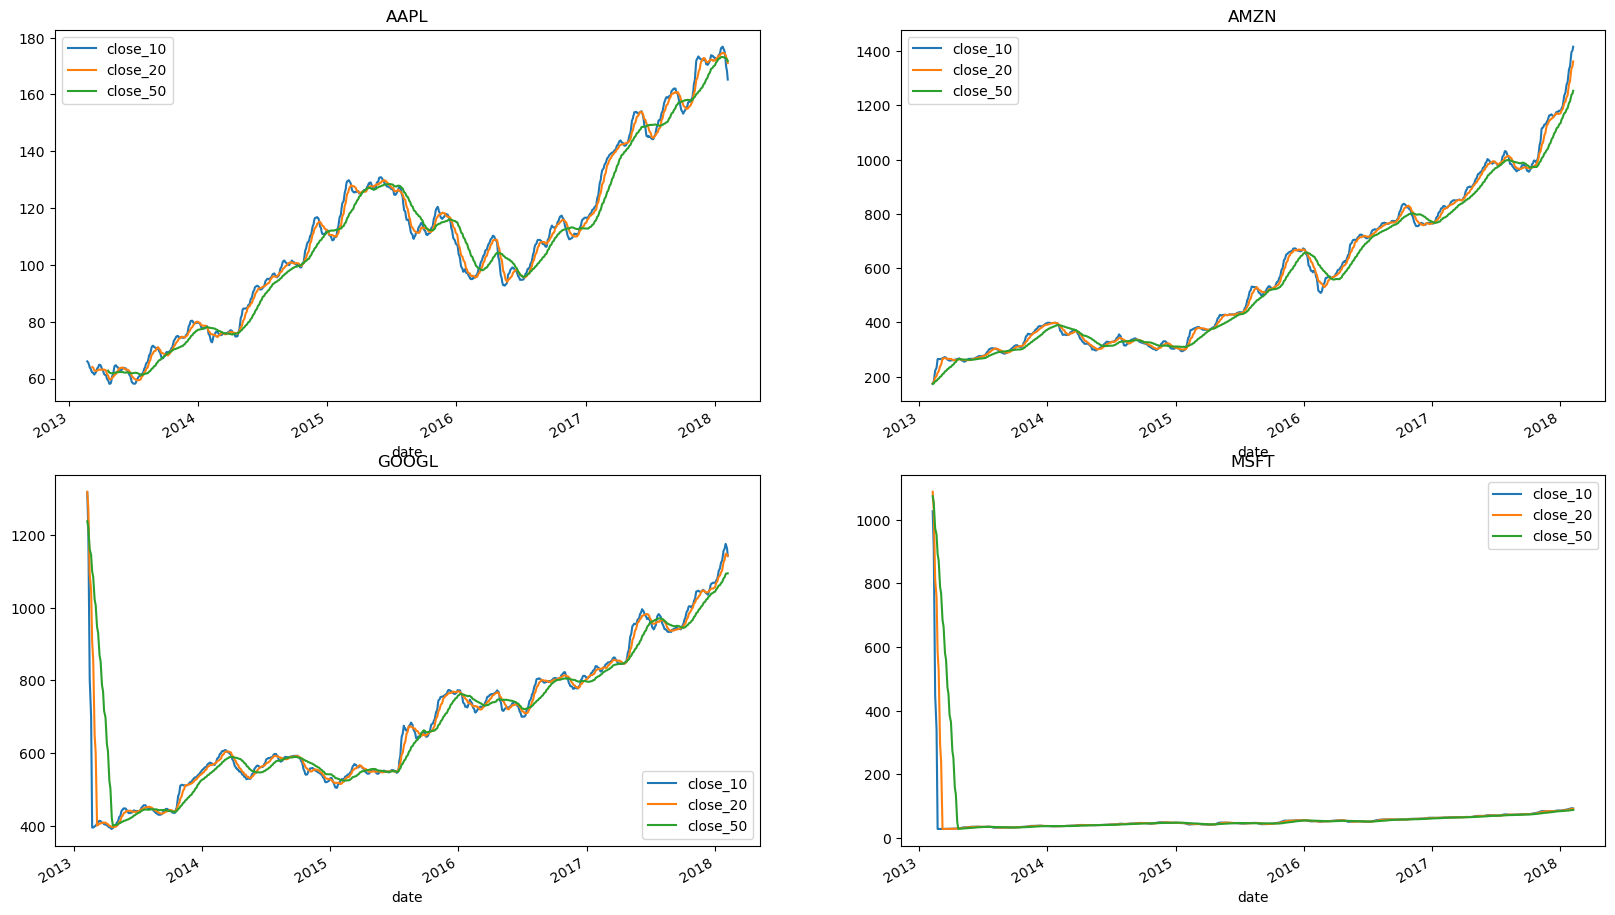

In [95]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)


# Due to data structure massive spikes on the start of the 
# graphs are caused by the moving averages not 
# having enough data to calculate the average.

## 4. Closing Price change analysis in apple stock

In [96]:
company_list

['individual_stocks_5yr\\\\AAPL_data.csv',
 'individual_stocks_5yr\\\\AMZN_data.csv',
 'individual_stocks_5yr\\\\GOOGL_data.csv',
 'individual_stocks_5yr\\\\MSFT_data.csv']

In [97]:
apple = pd.read_csv(r'individual_stocks_5yr\\AAPL_data.csv')

In [98]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [99]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [100]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [101]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

### pct_change() returns : Percentage change between the current and a prior element.

In [102]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [103]:
import plotly.express as px

In [104]:
px.line(apple , x="date" , y="Daily return(in %)") ## Plotting Line-plot of "date" vs "Daily return(in %)"..

## 5. Resampling Analysis for closing prices

In [105]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [106]:
apple['date'] =pd.to_datetime(apple['date'])

In [107]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [108]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [109]:
apple.set_index('date' , inplace=True)

In [110]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [111]:
apple['close'].resample('M').mean() # M is for resampling on monthly basis

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

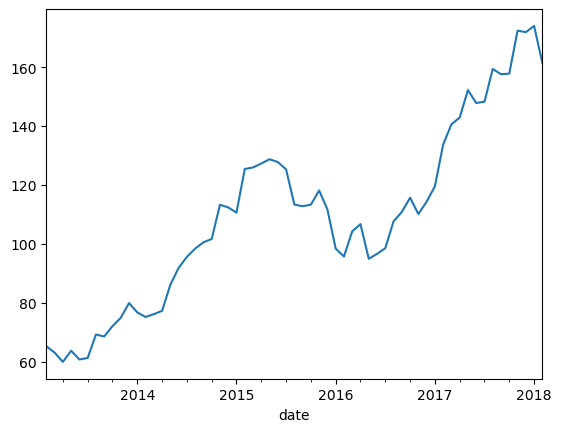

In [112]:
apple['close'].resample('M').mean().plot()

In [113]:
apple['close'].resample('Y').mean() # Y is for resampling on yearly basis

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

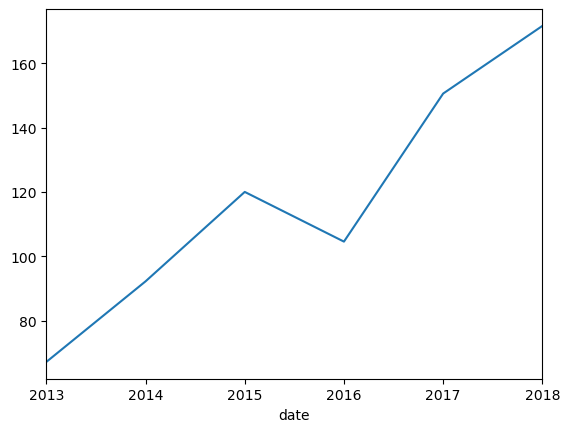

In [114]:
apple['close'].resample('Y').mean().plot()

In [115]:
apple['close'].resample('Q').mean() # Q is for resampling on quarterly basis

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

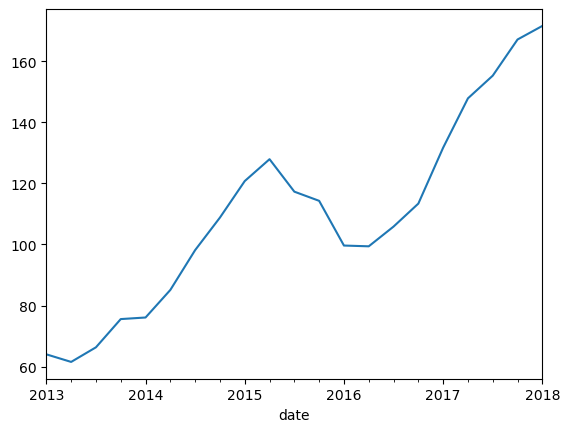

In [116]:
apple['close'].resample('Q').mean().plot()

## 6. Determining if there is correlation between these companies' closing prices

In [117]:
company_list

['individual_stocks_5yr\\\\AAPL_data.csv',
 'individual_stocks_5yr\\\\AMZN_data.csv',
 'individual_stocks_5yr\\\\GOOGL_data.csv',
 'individual_stocks_5yr\\\\MSFT_data.csv']

In [118]:
company_list[0]

'individual_stocks_5yr\\\\AAPL_data.csv'

In [119]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [120]:
closing_price = pd.DataFrame()

In [121]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [122]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


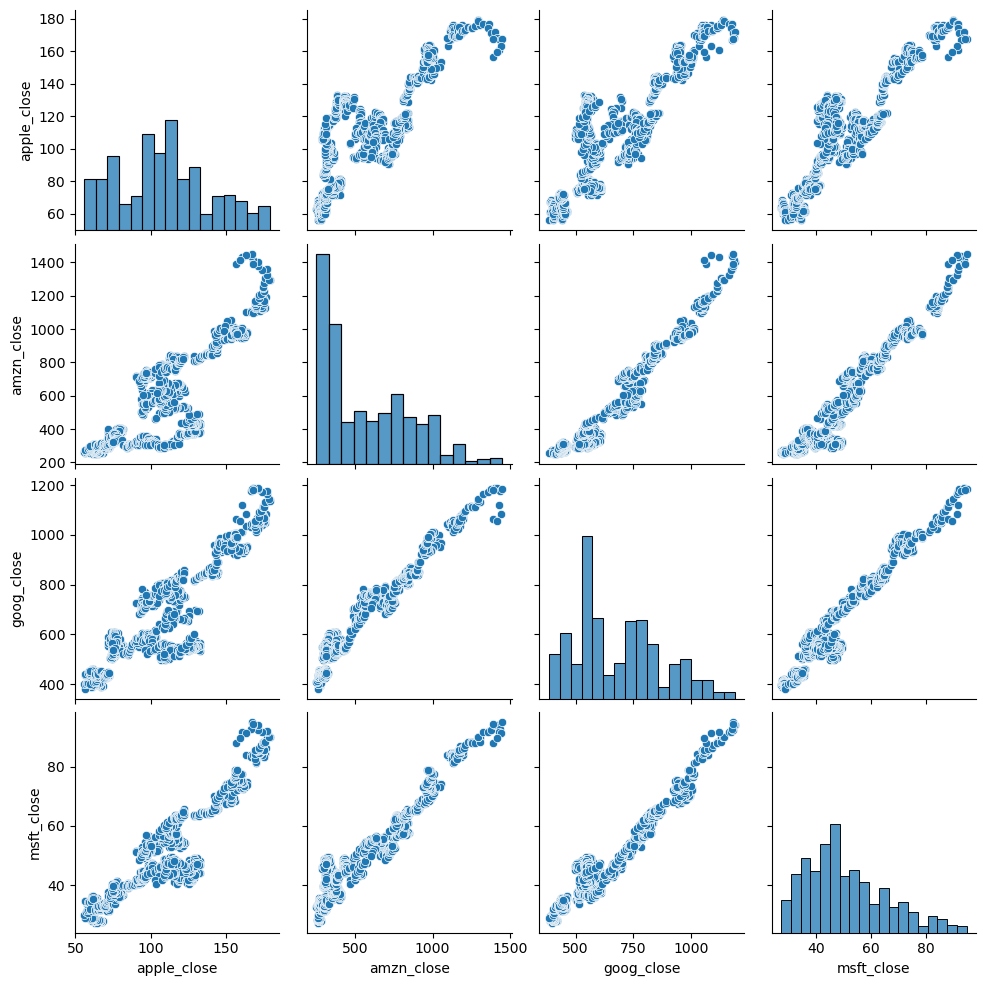

In [124]:
sns.pairplot(closing_price)

In [125]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.843736,0.899689
amzn_close,0.819078,1.000000,0.973988,0.955977
goog_close,0.843736,0.973988,1.000000,0.970779
msft_close,0.899689,0.955977,0.970779,1.000000


#### co-relation plot for stock prices

<Axes: >

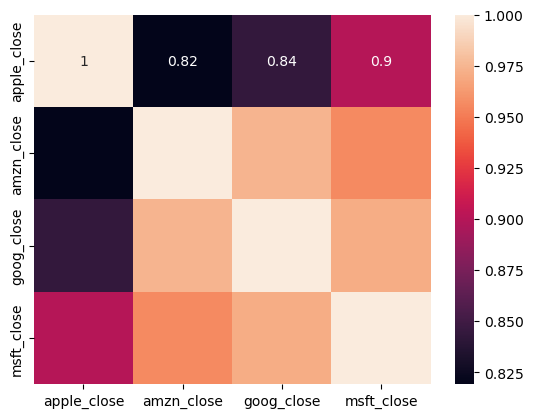

In [126]:
sns.heatmap(closing_price.corr() , annot=True)

## Conclusion
> A: Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96


## 7. Determining if there is correlation between Daily Closing price change and/or Daily Returns.

In [128]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [129]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [130]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [131]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [132]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [133]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,1.042235,-1.809506,-0.375625,1.125227
2,66.8428,258.70,390.7403,27.88,-2.506658,0.579293,-0.219841,0.071788
3,66.7156,269.47,391.8214,28.03,-0.190297,4.163123,0.276680,0.538020
4,66.6556,269.24,394.3039,28.04,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26,0.209043,-4.196734,-0.053290,-0.789391
1255,160.5000,1429.95,1119.2000,91.78,-4.339015,2.874101,-5.280173,-2.631021
1256,156.4900,1390.00,1062.3900,88.00,-2.498442,-2.793804,-5.075947,-4.118544
1257,163.0300,1442.84,1084.4300,91.33,4.179181,3.801439,2.074568,3.784091


In [134]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [142]:
closing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

closing_p

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,-0.375625,1.125227
2,-2.506658,0.579293,-0.219841,0.071788
3,-0.190297,4.163123,0.276680,0.538020
4,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,-0.053290,-0.789391
1255,-4.339015,2.874101,-5.280173,-2.631021
1256,-2.498442,-2.793804,-5.075947,-4.118544
1257,4.179181,3.801439,2.074568,3.784091


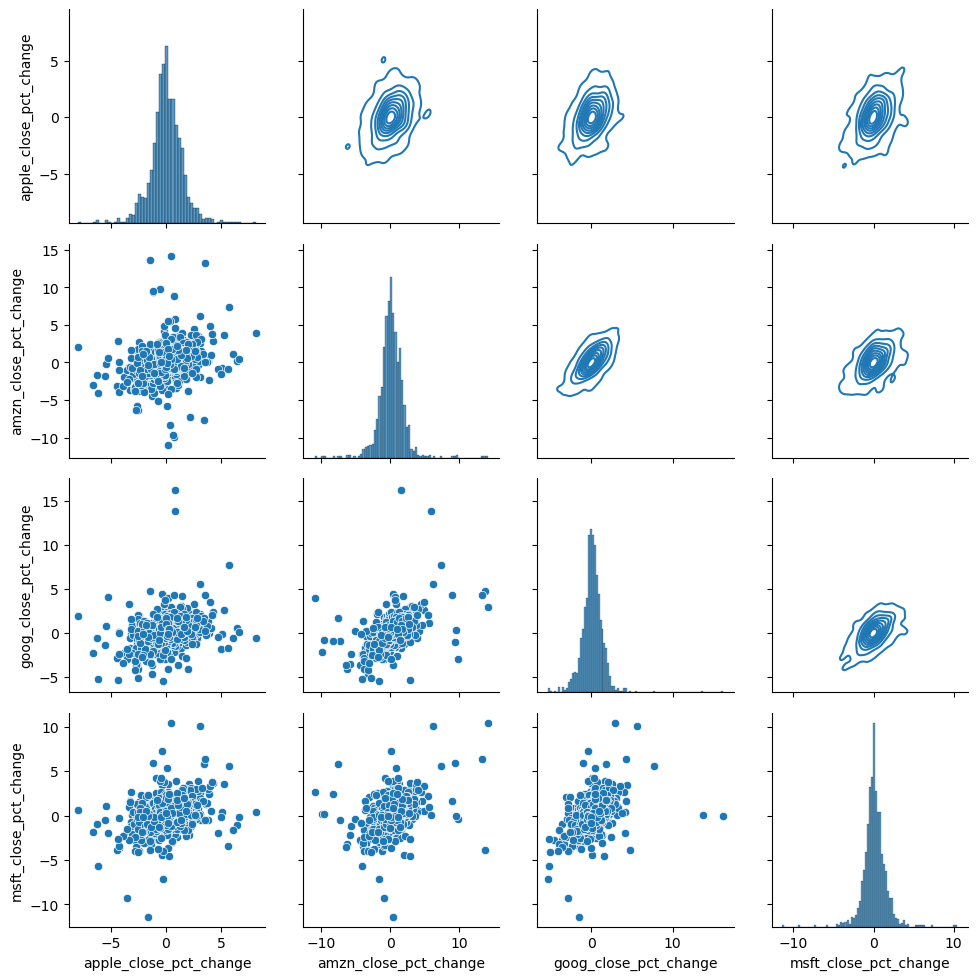

In [139]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [141]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
amzn_close_pct_change,0.287659,1.000000,0.548423,0.402678
goog_close_pct_change,0.348858,0.548423,1.000000,0.488373
msft_close_pct_change,0.366598,0.402678,0.488373,1.000000
